## Homework Set 1 - Connor Johnson

#### Preliminary Imports

In [49]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import root
from scipy.misc import derivative
import math
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
%config InlineBackend.figure_format = 'png'
from matplotlib import pyplot as plt

from itertools import product

plt.rcParams["font.family"]='Times New Roman'
plt.rcParams["mathtext.fontset"]='stix'
# set fontsize in markdown cells
from IPython.core.display import display, HTML, Latex
display(HTML("<style>.rendered_html { font-size: 16px; }</style>"))

### Problem 1

#### Part (a)

The given equation $\dot{N}/N = r - a(N-b)^2$ represents an inverse parabola. If $a>0$, then the right-hand side of the equation has a global maximum of $\dot{N}/N = r$ at $N=b$. If $r>0$ and $b>0$, then the global maximum of $\dot{N}/N$ would be positive at a positive $N$ value, which would reflect the Allee effect.

#### Part (b)

Dimensionless Variables for $\dot{N} = N(r - a(N-b)^2)$:
<ul>
<li>Population x = N/b</li>
<li>Time T = rt</li>
<li>Growth Rate k = (ab^2)/r</li>
</ul>


Dimensionless Equation: $\dot{x}\equiv\frac{dx}{dT} = f(x;k) = x(1-k(x-1)^2)$

Fixed Point: $f(x^*;k) = x^*(1-k(x^*-1)^2) = 0 \rightarrow x^* = 0$ or $1-k(x^*-1)^2 = 0 \rightarrow x^* = 1\pm\sqrt{\frac{1}{k}}, k>0$

Classifying Stabililty: $\ddot{x} = \frac{d}{dT}[f(x;k)] = \dot{x}(1-k(x-1)^2) + x(-2k(x-1)) = x(1-k(x-1)^2)^2 - 2kx(x-1)$. 
<br />
At $x^*$, $\ddot{x} = -2kx(x-1)$

At $x^*=0$, $\ddot{x}=0 $ <br /> 

In [50]:
#Starting off at an intial k=-10
dx = 0.00000000000000001
f = lambda x: x*(1-(-10)*(x-1)**2)
prev_diff = derivative(f,0,dx=dx)
print(f"At k = -10, df(x)/dT = {prev_diff}")

#Seeing where df/dT switches signs
for k in np.arange(-10, 10, 0.001):
    f = lambda x: x*(1-((float) (k))*(x-1)**2)
    if( derivative(f,0,dx=dx)<0 and prev_diff>=0 or derivative(f,0,dx=dx)>0 and prev_diff<=0):
        print(f"At k = {round(k,1)}, f(x) switches signs")
    prev_diff = derivative(f,0, dx=dx)
    

At k = -10, df(x)/dT = 11.0
At k = 1.0, f(x) switches signs


At $x^*=0$, the fixed point is stable for $k>1$, unstable otherwise
<br />
At $x^*=1+\sqrt{\frac{1}{k}}$ , $\ddot{x} = -2k(1+\sqrt{\frac{1}{k}})(\sqrt{\frac{1}{k}}) < 0 \rightarrow$ Stable
<br />
At $x^*=1-\sqrt{\frac{1}{k}}$ , $\ddot{x} = -2k(1-\sqrt{\frac{1}{k}})(-\sqrt{\frac{1}{k}}) = 2k(\sqrt{\frac{1}{k}})(1-\sqrt{\frac{1}{k}}) \rightarrow$ Stable if $0<k<1$, unstable if $k\geq1$

Transforming back into the original equation:

$x^* = \frac{N^*}{b} \rightarrow N^* = bx^*$

$x^* = 1\pm\sqrt{\frac{1}{k}} \rightarrow N^* = b(1\pm\sqrt{\frac{r}{ab^2}}) = b\pm\sqrt{\frac{r}{a}}$

Fixed Points and Stability:

$N^* = 0$; Stable if $\frac{ab^2}{r}>1$, unstable otherwise

$N^* = b+\sqrt{\frac{r}{a}}$; Stable

$N^* = b-\sqrt{\frac{r}{a}}$; Stable if $0<\frac{ab^2}{r}<1$, unstable if $\frac{ab^2}{r}\geq1$


#### Part (c)

Graph 1: $r=5, a=1, b=2$. This results in two stable fixed points at $N=2\pm\sqrt{5}$ and an unstable fixed point at $N=0$.

Initial conditions are every integer between -5 and 5.

In [51]:
# solve numerically for the function for 0<t<t_max
# input: t_max, dt, N_0, r, a, b
# output: [time, population] = [t_i, N(t_i)]
ode = lambda N, t, r, a, b: N*(r-a*(N-b)**2)
def integrate_pop_ode(t_max,dt,N_0,r,a,b):
    t = np.arange(0,t_max+dt,dt)
    N0 = [N_0]
    sol = odeint(ode,N0,t, args = (r,a,b))
    return [t, sol.T[0]]

In [52]:
def show_pop_plot(dt, t_max, x_0min, x_0max, dx, r, a, b):
    #Defining Parameters
    x_0 = np.arange(x_0min,x_0max+dx,dx)

    #Using PyPlot to make the graphs
    fig, ax = plt.subplots()
    ax.set_xlim(0,t_max)
    ax.set_ylim(np.amin(x_0),np.amax(x_0))

    #Solving numerically
    for x0 in x_0:
        tt, num_sol = integrate_pop_ode(t_max, dt, x0, r, a, b)
        plt.plot(tt, num_sol)

    plt.ylabel('$N(t)$')
    plt.xlabel('$t$')
    plt.show()

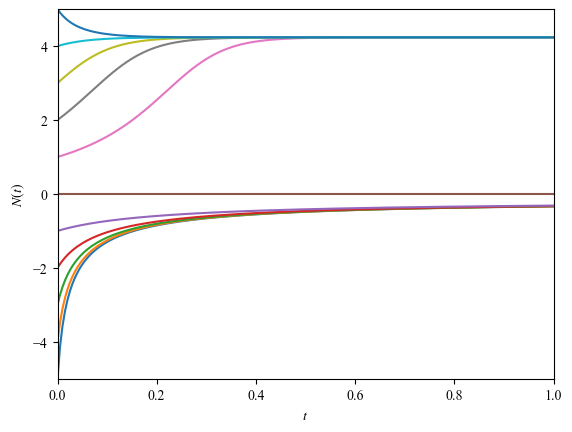

In [53]:
show_pop_plot(0.005, 1, -5, 5, 1, 5, 1, 2)

Graph 2: $r=2, a=2, b=4$. This results in two stable fixed point at $N=0$ and $N=5$ and an unstable fixed point at $N=3$.

Initial conditions are every integer between 0 and 7.

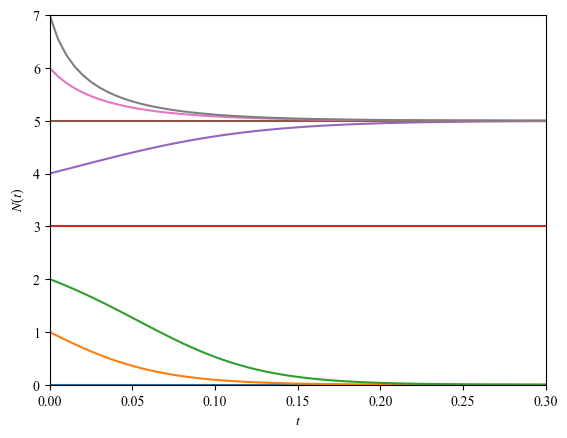

In [54]:
show_pop_plot(0.005, 0.3, 0, 7, 1, 2, 2, 4)

#### Part (d)

Graphing the logistic equation by solving it numerically at limiting capacity $k = 1$ and growth rate $r = 1$.

Initial conditions are values from 0 to 2, spaced by 0.25.

In [55]:
# solve numerically for the function for 0<t<t_max
# input: t_max, dt, N_0, k
# output: [time, population] = [t_i, N(t_i)]
ode = lambda N, t, k, r: N*r*(1-N/k)
def integrate_log_ode(t_max,dt,N_0,k,r):
    t = np.arange(0,t_max+dt,dt)
    N0 = [N_0]
    sol = odeint(ode,N0,t, args = (k,r))
    return [t, sol.T[0]]

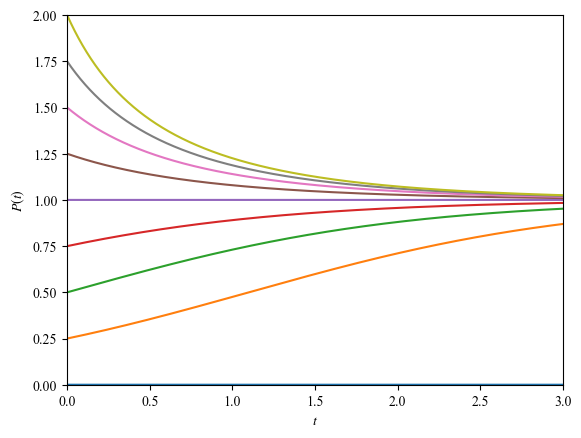

In [56]:
#Defining Parameters
t_max = 3
dt = 0.001
x_0 = np.arange(0,2+.25,.25)

#Using PyPlot to make the graphs
fig, ax = plt.subplots()
ax.set_xlim(0,t_max)
ax.set_ylim(np.amin(x_0),np.amax(x_0))

#Solving numerically
for x0 in x_0:
    tt, num_sol = integrate_log_ode(t_max, dt, x0, 1, 1)
    plt.plot(tt, num_sol)

plt.ylabel('$P(t)$')
plt.xlabel('$t$')
plt.show()

The main difference between N(t) and the logistic equaion is that N(t) has 3 fixed points, of which two are stable if all of the parameters are positive. The $N=0$ case may or may not be a stable point. Compare that to the logistic equation, where it only has two fixed points, and it is always the the case that the $P=k$ creates a stable fixed point and $P=0$ creates an unstable fixed point if the parameters are positive. Visually, the logistic equation always look like it converges to one value while $N(t)$ usually has two values where it can to converge for $N(0)\geq 0$. At times, $N(t)$ can be seen to converge to 3 values, as seen in graph 2.

### Problem 2

#### Part (a)

Solving $\dot{x} = -x^3$:
$\\ dx = (-x^3)dt$
$\\ \frac{dx}{x^3} = -dt$
$\\ \int \frac{dx}{x^3} = \int -dt$  
$\\ \frac{-1}{2}x^{-2} = -t + C$
$\\ x^{-2} = -2(-t + C) = 2t + C$
$\\ x(t) = \frac{1}{\sqrt{2t + C}}$ or $x(t) = \frac{-1}{\sqrt{2t + C}}$
$\\$  
$\\$ Since x is not an exponential function, the decay is not a exponential function
$\\ \lim_{t\to\infty} x(t) = \lim_{t\to\infty} \frac{1}{\sqrt{2t + C}} = 0$
$\\$ This is the same for the other solution of $x(t) = \frac{-1}{\sqrt{2t + C}}$

#### Part (b)

With the initial condition $ x_0 = 10 $, it is necessary to solve for $ C $ first:
$\\ x(0) = x_0 = \frac{1}{\sqrt{2(0) + C}}$
$\\ x_0^{-2} = C$
$\\ C = \frac{1}{100}$
$\\$ Therefore, at $x(0) = 10$, $x(t) = \frac{1}{\sqrt{2t + \frac{1}{100}}}$


##### Creating the Plot

In [57]:
# solve numerically for the decay for 0<t<t_max
# input: t_max, dt, x_0
# output: [time, position] = [t_i, x(t_i)]
def decay_ode(x,t):
    x1 = x
    dxdt = -x1**3
    return dxdt
def integrate_decay_ode(t_max,dt,x_0):
    t = np.arange(0,t_max+dt,dt)
    x0 = [x_0]
    sol = odeint(decay_ode,x0,t)
    return [t, sol.T[0]]

In [58]:
#decay function
#input: t, x_0
#output: x(t) given x_0
decay_func = lambda t, x_0: 1/(math.sqrt(2*t + 1/(x_0**2)))

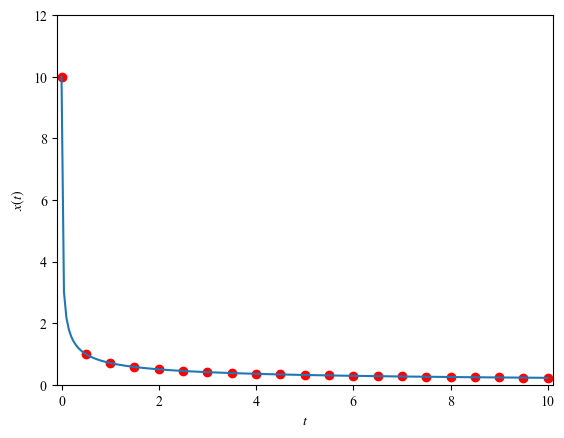

In [59]:
#Using PyPlot to create the graph
fig, ax = plt.subplots()
ax.set_xlim(-0.1,10.1)
ax.set_ylim(0,12)

#Defining parameters
t_max = 10
dt = 0.5
t_step = 200
x_0 = 10

#Solving numerically
tt, num_sol = integrate_decay_ode(t_max, dt, x_0)

#Using the fucntion obtained by solving analytically
t_range = np.linspace(0, t_max, t_step)
analytic_sol = [decay_func(t_, x_0) for t_ in t_range]

# red dots = numerical solution; blue line = analytic solution
plt.plot(tt, num_sol, 'ro', t_range, analytic_sol)
plt.ylabel('$x(t)$')
plt.xlabel('$t$')
plt.show()

### Problem 3

#### Part (a)

Solving for $x$ in the equation $f(x) = e^{-x} + 3x - x^2 -1 = 0$ to find the fixed points.

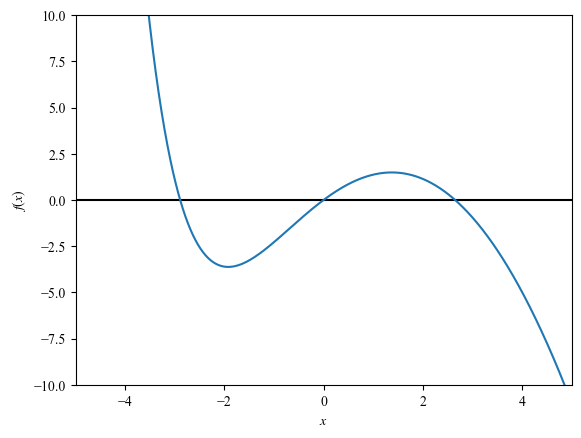

In [60]:
# define f(x)
f = lambda x: np.exp(-x) + 3*x - x**2 -1

#First graph f(x) to see how many fixed points there are
x_range = np.linspace(-5, 5, 1000)
f_range = [f(x_) for x_ in x_range]

#Plots the x-axis
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

#Plots f(x)
plt.plot(x_range, f_range)

#Formats the graph
plt.axis([-5, 5, -10, 10])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Since there are 3 x-values where f(x)=0, there are 3 fixed points

In [61]:
#3 variables to store the x-values at the 3 fixed points
x1 = -3; x2 = 0; x3 = 3
x_fp = root(f,[x1,x2,x3]).x

#Determine stability at each fixed point & print out the results
for z in x_fp:
    fp_FP = derivative(f,z)
    stability = "Unstable" if fp_FP>0 else "Stable"
    print(stability, 'fixed point at x = ', round(z,2))

Stable fixed point at x =  -2.89
Unstable fixed point at x =  0.0
Stable fixed point at x =  2.65


#### Part (b)

Solving the system numerically for $0\leq t<5$ for various initial conditions $x_0$ where $x_0\in [-5,5]$.

In [62]:
dt = 0.01
t = np.arange(0,5+dt,dt)
x_sol = lambda x0: odeint(lambda x,t: f(x),x0,t)

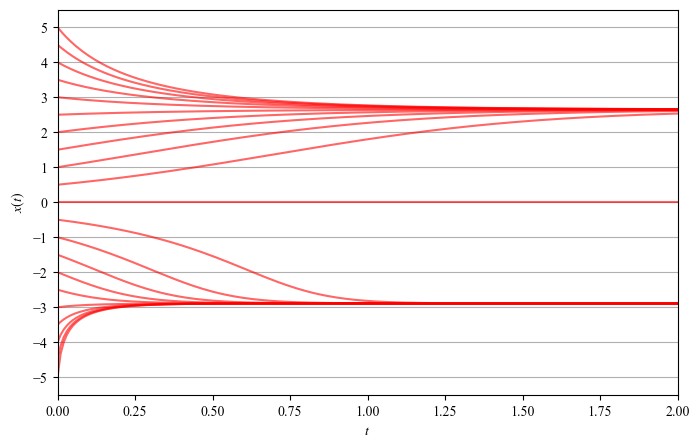

In [63]:
# plot x_sol(x0) vs t for various values of x0
fig, ax = plt.subplots(figsize=(8,5))
dx0 = 0.5
for x0 in np.arange(-5, 5 + dx0, dx0):
    ax.plot(t,x_sol(x0),'r-',lw=1.5,alpha=0.6)
ax.set_xlim(0,2)
tp = np.arange(-5, 6, 1)
ax.set_yticks(tp)
ax.set_ylim(-5.5,5.5)
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.grid(axis='y',which='major')

#### Part (c)

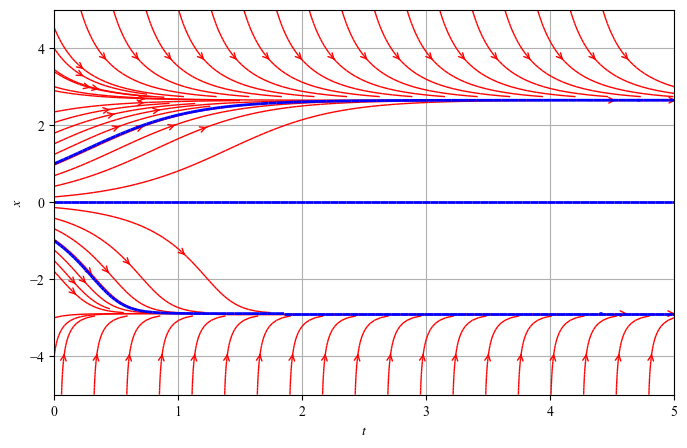

In [64]:
# plot the slope field 
xx=np.arange(0,10.2,0.1)
yy=np.arange(-5,5.1,0.05)
X,Y = np.meshgrid(xx,yy)

fig, ax0=plt.subplots(figsize=(8,5))

x0 = np.linspace(0,5,20)
y0 = np.ones(len(x0))*3
seed_points=np.array([x0,y0])
ax0.streamplot(X,Y, 1+0*X,f(Y),start_points=seed_points.T,density=4,
               linewidth=1,color='red',arrowstyle='->')

x0 = np.linspace(0,5,20)
y0 = np.ones(len(x0))*-3
seed_points=np.array([x0,y0])
ax0.streamplot(X,Y, 1+0*X,f(Y),start_points=seed_points.T,density=4,
               linewidth=1,color='red',arrowstyle='->')

y0 = np.linspace(-4,4,30)
x0 = np.zeros(len(y0))
seed_points=np.array([x0,y0])
ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=seed_points.T,density=5,
               linewidth=1,color='red',arrowstyle='->')

ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=[[0,1]],density=5,
               linewidth=2,color='blue',arrowstyle='-')

ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=[[0,0]],density=5,
               linewidth=2,color='blue',arrowstyle='-')

ax0.streamplot(X, Y, 1+0*X,f(Y),start_points=[[0,-1]],density=5,
               linewidth=2,color='blue',arrowstyle='-')

ax0.grid(axis='both')  
ax0.set_xlim(0,5)
ax0.set_ylim(-5,5)
ax0.set_xlabel('$t$')
ax0.set_ylabel('$x$')
plt.show()

### Problem 4

Proof By Contradiction

Assume that $\dot{x} = f(x), f(x)\in\mathbb{R}$ has a nontrivial periodic solution where $x(t) = x(t+T)$ for some $T>0$ and $x(t)\neq x(t+s)$ for all $s\in (0,T)$. By considering the integral $\int_t^{t+T} f(x)(\frac{dx}{dt})dt$, it will be shown that $x(t)$ cannot be periodic.

There are two ways to solve $\int_t^{t+T} f(x)(\frac{dx}{dt})dt$.

Method 1: Change of variables from $t$ to $x$

$\int_t^{t+T} f(x)(\frac{dx}{dt})dt= \int_{x(t)}^{x(t+T)} f(x)dx$

Since $x(t) = x(t+T)$, $\int_{x(t)}^{x(t+T)} f(x)dx= \int_{x(t)}^{x(t)} f(x)dx=0$.

By this method $\int_t^{t+T} f(x)(\frac{dx}{dt})dt=0$.

Method 2: Using the fact that $\frac{dx}{dt}=f(x)$

$\int_t^{t+T} f(x)(\frac{dx}{dt})dt= \int_t^{t+T} f(x)(f(x))dt= \int_t^{t+T} (f(x))^2dt$

Since $(f(x))^2\geq 0$ because $f(x)\in\mathbb{R}$, in order for the integral to be equal to zero as shown in Method 1, the only function that $f(x)$ can be equal to is $f(x)=0$. However, if $f(x)=0$, then the solution to $\dot{x} = f(x)$ would be $x(t)=C, C\in\mathbb{R}$. $x(t)$ would not be a periodic function. This is impossible based on the initial assumption that $x(t)$ was a periodic function. By this contradiction, it must be that $\dot{x} = f(x)$ has no periodic solutions.

QED